In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from tensorflow.keras import layers, Model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Flatten, Add, Concatenate
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_lattice as tfl
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
import numpy as np
import pandas as pd
# import shap

import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as tfk_layers
import tensorflow.keras as tfk
import tensorflow_lattice as tfl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import tensorflow as tf

num_samples=1000
%run TimeNetworksV3

# develop meta_data

In [11]:
class MetaA(type):
    pass

class MetaB(type):
    pass

class CommonMeta(MetaA, MetaB):
    pass

class BaseA(metaclass=MetaA):
    pass

class BaseB():
    pass

class Derived(tf.keras.layers.Layer, BaseA, BaseB, metaclass=CommonMeta):  # Resolve conflict
    pass

Derived()

<Derived name=derived_4, built=False>

In [2]:
# data ger
x = RandomGenerator(num_samples=9, depth=1, data_point_dim=1,Categorical=5,Time_Series=0)

In [17]:
# Generate Data
# develop meta_data
# exec(open("NetworksV2.py").read())

arch_layers_def = [{"Net": "Dense", "Val": 128}]
arch_layers_number = [{"Net": "Dense", "Val": 128},
                      {"Net": "Dense", "Val": 128}]
arch_layers_time = [{"Net": "LSTM", "Val": 32}]
arch_layers_categ = [{"Net": "CategNet", "Val": 128}]


data_dict={}
data_info={}
i=0
i = i + 1; var = f"X{i}"
x=RandomGenerator(num_samples=num_samples, depth=1, data_point_dim=1,Categorical=0,Time_Series=0,distribution="uniform",)
data_dict[var]=x['data']; x.pop("data")
data_info[var]=x

i = i + 1; var = f"X{i}"
x=RandomGenerator(num_samples=num_samples, depth=1, data_point_dim=1,Categorical=0,Time_Series=0,distribution="normal",)
data_dict[var]=x['data']; x.pop("data")
data_info[var]=x

i = i + 1; var = f"X{i}"
x=RandomGenerator(num_samples=num_samples, depth=1, data_point_dim=1,Categorical=0,Time_Series=0,distribution="normal",)
data_dict[var]=x['data']; x.pop("data")
data_info[var]=x


meta_data = {}; i=0
i = i + 1; var = f"X{i}"
meta_data[var] = {"input_dim": data_info[var]["input_dim"], "arch_layers": arch_layers_number, "name": var, "Time_Series": data_info[var]["Time_Series"],"Categorical":data_info[var]["Categorical"]}
i = i + 1; var = f"X{i}"
meta_data[var] = {"input_dim": data_info[var]["input_dim"], "arch_layers": arch_layers_number, "name": var, "Time_Series": data_info[var]["Time_Series"],"Categorical":data_info[var]["Categorical"]}
i = i + 1; var = f"X{i}"
meta_data[var] = {"input_dim": data_info[var]["input_dim"], "arch_layers": arch_layers_number, "name": var, "Time_Series": data_info[var]["Time_Series"],"Categorical":data_info[var]["Categorical"]}

# display(meta_data)

interactions=[[list(data_info)[i],list(data_info)[j]] for i in range(len(list(data_info))) for j in range(i,len(list(data_info)))]
print()
np.random.shuffle(interactions)
interactions=interactions[:3]


meta_data_pair ={}
arch_layers2 = [{"Net": "Dense", "Val": 256,  "Norm": [-1,1]}]

var0, var1 = interactions[0]

meta_data_pair[f"{var0} x {var1}"] = {
    "input_dim": [meta_data[var]["input_dim"] for var in [var0, var1]],
    "name": [meta_data[var]["name"] for var in [var0, var1]],
    "arch_layers": [meta_data[var]["arch_layers"][:-1] for var in [var0, var1]] + [arch_layers2],
    "Time_Series": [meta_data[var]["Time_Series"] for var in [var0, var1]],
}

var0, var1 = interactions[1]

meta_data_pair[f"{var0} x {var1}"]  = {
    "input_dim": [meta_data[var]["input_dim"] for var in [var0, var1]],
    "name": [meta_data[var]["name"] for var in [var0, var1]],
    "arch_layers": [meta_data[var]["arch_layers"][:-1] for var in [var0, var1]] + [arch_layers2],
    "Time_Series": [meta_data[var]["Time_Series"] for var in [var0, var1]],
}

var0, var1 = interactions[2]
meta_data_pair[f"{var0} x {var1}"]  = {
    "input_dim": [meta_data[var]["input_dim"] for var in [var0, var1]],
    "name": [meta_data[var]["name"] for var in [var0, var1]],
    "arch_layers": [meta_data[var]["arch_layers"][:-1] for var in [var0, var1]] + [arch_layers2],
    "Time_Series": [meta_data[var]["Time_Series"] for var in [var0, var1]],
}


# display(meta_data_pair)

def fxn(x):
    n= np.random.random_integers(0,3)
    if n==0:
        return x**2/2
    if n==1:
        return x*np.exp(-x)
    if n==2:
        return x**2/2-np.sin(x*np.pi)
    if n==3:
        return x**2/2+x
    
y=0
for n,var in enumerate(list(meta_data)):
    m= np.random.uniform(0,1,meta_data[var]['input_dim'][1:])
    print(var, m)
    w=np.random.uniform(0,10)
    y=y+fxn(np.dot(m.T,data_dict[var].T))*w
    # print(w)
    # print(y.shape)

y=y-y.mean()
y=y/np.max(np.abs(y))
y=MinMaxScaler().fit_transform(y.reshape(-1,1));

W=np.random.uniform(0,1,num_samples)

i_list=[i for i in range(num_samples)]
np.random.shuffle(i_list)
i_list=i_list

data_dict["target"]=y.reshape(1,-1)[0]
data_dict["weight"]=W.reshape(1,-1)[0]*0+1

meta_target={"target":"target","weight":"weight", "train":i_list[:int(num_samples*.7)],
             "valid":[ i_list[int(num_samples*.7):],i_list[int(num_samples*.4):int(num_samples*.8)], ]}
meta_target={"target":"target","weight":"weight", "train":i_list[:int(num_samples*.7)],
             "valid":[  ]}





X1 [0.78349656]
X2 [0.19278566]
X3 [0.83162011]


C:\Users\Giwa\AppData\Local\Temp\ipykernel_57696\388872985.py:80: DeprecationWarning: This function is deprecated. Please call randint(0, 3 + 1) instead
  n= np.random.random_integers(0,3)


In [5]:
# Test Main Networks
%run TimeNetworksV3
MainEffect_Block_Networks = {}
for var in meta_data:
    arch_layers = meta_data[var]["arch_layers"]
    input_dim = meta_data[var]["input_dim"]
    Time_Series = meta_data[var]["Time_Series"]
    sg = MainEffect_Net(input_dim=input_dim,name=var,arch_layers=arch_layers,Time_Series=Time_Series)
    MainEffect_Block_Networks[var] = sg
    
single_outputs = [MainEffect_Block_Networks[var].call(data_dict[var]) for var in meta_data]

for x in single_outputs:
    print(x.shape)
    
    
single_outputs = [MainEffect_Block_Networks[var].call(data_dict[var]) for var in meta_data]


PairEffect_Block_Networks = {}
Output_Layer = tf.keras.layers.Dense(1,activation="linear")
for var in meta_data_pair:
    name = meta_data_pair[var]["name"]
    arch_layers = meta_data_pair[var]["arch_layers"]
    input_dim = meta_data_pair[var]["input_dim"]
    Time_Series = meta_data_pair[var]["Time_Series"]
    sg = PairEffect_Net( input_dim=input_dim,name=name,arch_layers=arch_layers,Time_Series=Time_Series )
    PairEffect_Block_Networks[var] = sg


pair_outputs = [PairEffect_Block_Networks[var].call([data_dict[var] for var in meta_data_pair[var]["name"]]) for var in meta_data_pair]

for x in pair_outputs:
    print(x.shape)

(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)


In [24]:
%run TimeNetworksV4
self = MainEffectBlock(meta_data,meta_target,epochs=20,batch_size=250,endLayer=False)
y=self.call(data_dict)
self.test_calibrate()

{'input_dim': (1000, 1), 'arch_layers': [{'Net': 'Dense', 'Val': 128}, {'Net': 'Dense', 'Val': 128}], 'name': 'X1', 'Time_Series': 0, 'Categorical': 0, 'Monotonicity': 0, 'Norm': [-1, 1]}
{'input_dim': (1000, 1), 'arch_layers': [{'Net': 'Dense', 'Val': 128}, {'Net': 'Dense', 'Val': 128}], 'name': 'X2', 'Time_Series': 0, 'Categorical': 0, 'Monotonicity': 0, 'Norm': [-1, 1]}
{'input_dim': (1000, 1), 'arch_layers': [{'Net': 'Dense', 'Val': 128}, {'Net': 'Dense', 'Val': 128}], 'name': 'X3', 'Time_Series': 0, 'Categorical': 0, 'Monotonicity': 0, 'Norm': [-1, 1]}


[{'C1': 1.6391277313232422e-07, 'C2': 0.9999994087219238},
 {'C1': 1.6391277313232422e-07, 'C2': 0.9999994087219238},
 {'C1': 1.6391277313232422e-07, 'C2': 0.9999994087219238}]

In [123]:
%run TimeNetworksV3
self = PairEffectBlock(meta_data,meta_data_pair,meta_target)
print(self.call(data_dict).shape,self.call_outputs(data_dict).shape,len(self.trainable_variables))

self.test_calibrate()

(1000, 1) (1000, 3) 27


[{'C1': -3.799200057983399e-08, 'C2': 1.0000000164031984},
 {'C1': -1.2481212615966799e-08, 'C2': 1.000000007915497},
 {'C1': 4.310905933380127e-09, 'C2': 0.9999998556375503}]

{'input_dim': (1000, 1), 'arch_layers': [{'Net': 'Dense', 'Val': 128}, {'Net': 'Dense', 'Val': 128}], 'name': 'X1', 'Time_Series': 0, 'Categorical': 0, 'Monotonicity': 0, 'Norm': [-1, 1]}
{'input_dim': (1000, 1), 'arch_layers': [{'Net': 'Dense', 'Val': 128}, {'Net': 'Dense', 'Val': 128}], 'name': 'X2', 'Time_Series': 0, 'Categorical': 0, 'Monotonicity': 0, 'Norm': [-1, 1]}
{'input_dim': (1000, 1), 'arch_layers': [{'Net': 'Dense', 'Val': 128}, {'Net': 'Dense', 'Val': 128}], 'name': 'X3', 'Time_Series': 0, 'Categorical': 0, 'Monotonicity': 0, 'Norm': [-1, 1]}
(1000, 1) (1000, 3) 21
trainable variables : 21 Total variable : 21
[{'w': 0.0384896100404743, 'c': 0.09998961552977562}, {'w': 0.037882922872436185, 'c': 0.10075691133737565}, {'w': 0.037882922872436185, 'c': 0.10075691133737565}]


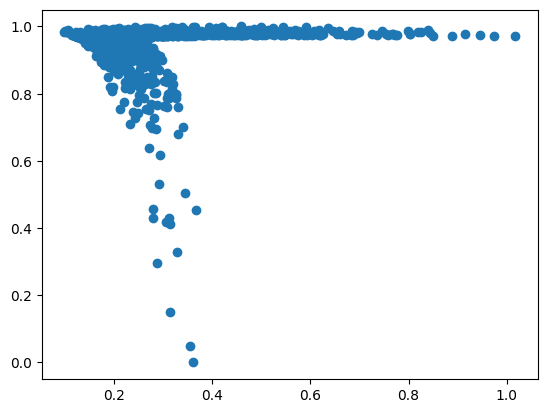

(1000, 1) (1000, 3) 27
trainable variables : 27 Total variable : 27
[{'w': 0.0816459983621857, 'c': 0.2601270419299603}, {'w': 0.0816459983621857, 'c': 0.2601270419299603}, {'w': 0.07450447563550504, 'c': 0.23601251632869244}]


{0: [[0.27635443], []], 1: [[0.22987242], []]}

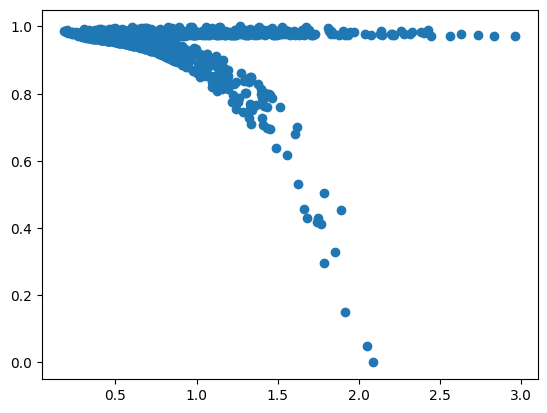

In [63]:
%run TimeNetworksV4
self = MainEffectBlock(meta_data,meta_target,epochs=2,batch_size=250,record=True,verbose=3)
print(self.call(data_dict).shape,self.call_outputs(data_dict).shape,len(self.trainable_variables))
self.Train(data_dict)

plt.scatter(self.predict(data_dict),data_dict["target"])
print(self.coefficients())
plt.show()

self = PairEffectBlock(meta_data,meta_data_pair,meta_target,epochs=2,batch_size=250,record=True,verbose=3)
print(self.call(data_dict).shape,self.call_outputs(data_dict).shape,len(self.trainable_variables))
self.Train(data_dict)

plt.scatter(self.predict(data_dict),data_dict["target"])
print(self.coefficients())
self.Record_Losses


In [58]:
len(np.array([[0,1],[0,1]]).shape),len(np.array([0,1]).shape)

(2, 1)

{'input_dim': (1000, 1), 'arch_layers': [{'Net': 'Dense', 'Val': 128}, {'Net': 'Dense', 'Val': 128}], 'name': 'X1', 'Time_Series': 0, 'Categorical': 0, 'Monotonicity': 0, 'Norm': [-1, 1]}
{'input_dim': (1000, 1), 'arch_layers': [{'Net': 'Dense', 'Val': 128}, {'Net': 'Dense', 'Val': 128}], 'name': 'X2', 'Time_Series': 0, 'Categorical': 0, 'Monotonicity': 0, 'Norm': [-1, 1]}
{'input_dim': (1000, 1), 'arch_layers': [{'Net': 'Dense', 'Val': 128}, {'Net': 'Dense', 'Val': 128}], 'name': 'X3', 'Time_Series': 0, 'Categorical': 0, 'Monotonicity': 0, 'Norm': [-1, 1]}
(1000, 1) (1000, 3) 21
trainable variables : 21 Total variable : 21


{0: [[0.62223613], []],
 1: [[0.45029798], []],
 2: [[0.3309114], []],
 3: [[0.24722977], []],
 4: [[0.19575034], []],
 5: [[0.16909881], []],
 6: [[0.15707055], []],
 7: [[0.15125775], []],
 8: [[0.14470617], []],
 9: [[0.13386907], []],
 10: [[0.11892938], []],
 11: [[0.102152124], []],
 12: [[0.08613783], []],
 13: [[0.07284092], []],
 14: [[0.062261853], []]}

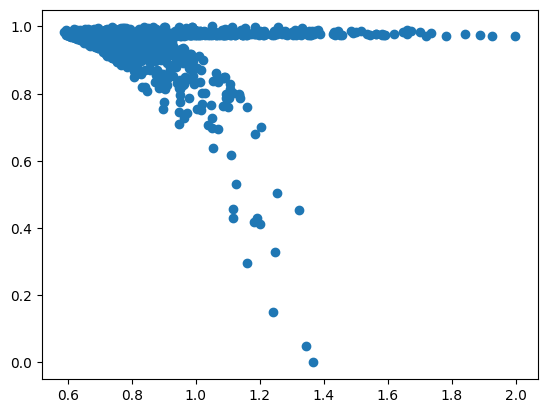

In [74]:
%run TimeNetworksV5
self = MainEffectBlock(meta_data,meta_target,epochs=15,batch_size=250,record=True,verbose=3)
print(self.call(data_dict).shape,self.call_outputs(data_dict).shape,len(self.trainable_variables))
self.Train(data_dict)

plt.scatter(self.predict(data_dict),data_dict["target"])
self.coefficients()
self.Record_Losses

(1000, 1) (1000, 3) 27
trainable variables : 27 Total variable : 27
[{'w': 0.08044634396117471, 'c': 0.3557259154498577}, {'w': 0.08044634396117471, 'c': 0.3557259154498577}, {'w': 0.011027705741906108, 'c': 0.2682432749927044}]


{0: [[0.3520593], []],
 1: [[0.20529842], []],
 2: [[0.22622822], []],
 3: [[0.24254335], []],
 4: [[0.19765492], []],
 5: [[0.13716125], []],
 6: [[0.09825024], []],
 7: [[0.08354575], []],
 8: [[0.0761562], []],
 9: [[0.06381391], []],
 10: [[0.04913735], []],
 11: [[0.04168133], []],
 12: [[0.04074915], []],
 13: [[0.036512725], []],
 14: [[0.029404735], []]}

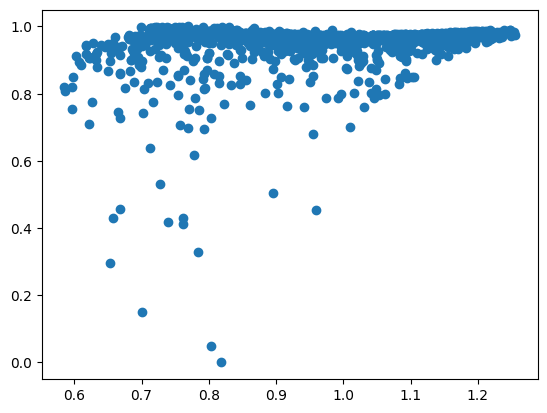

In [76]:
%run TimeNetworksV5
self = PairEffectBlock(meta_data,meta_data_pair,meta_target,epochs=15,batch_size=250,record=True,verbose=3)
print(self.call(data_dict).shape,self.call_outputs(data_dict).shape,len(self.trainable_variables))
self.Train(data_dict)

plt.scatter(self.predict(data_dict),data_dict["target"])
print(self.coefficients())
self.Record_Losses

In [68]:
# display(self.get_weights(data_dict))
display(pd.DataFrame(self.compute_feature_importance_var(data_dict),index=["Importance"]).T)
display(pd.DataFrame(self.compute_feature_importance_mean(data_dict),index=["Importance"]).T)
display(pd.DataFrame(self.compute_feature_partial_loss(data_dict),index=["Importance"]).T)

AttributeError: 'GAMI' object has no attribute 'compute_feature_importance_var'

In [83]:
%%time
%run TimeNetworksV5
            
self=GAMI(meta_data=meta_data,meta_target=meta_target,  meta_data_pair=meta_data_pair, epochs=[6]*3, 
          batch_size = 250,  task_type="Regression",learning_rate=[0.005,0.005,0.001])



self.Train(data_dict, 0)  
self.Train(data_dict, 1)  
self.Train(data_dict, 2)  

{'input_dim': (1000, 1), 'arch_layers': [{'Net': 'Dense', 'Val': 128}, {'Net': 'Dense', 'Val': 128}], 'name': 'X1', 'Time_Series': 0, 'Categorical': 0, 'Monotonicity': 0, 'Norm': [-1, 1]}
{'input_dim': (1000, 1), 'arch_layers': [{'Net': 'Dense', 'Val': 128}, {'Net': 'Dense', 'Val': 128}], 'name': 'X2', 'Time_Series': 0, 'Categorical': 0, 'Monotonicity': 0, 'Norm': [-1, 1]}
{'input_dim': (1000, 1), 'arch_layers': [{'Net': 'Dense', 'Val': 128}, {'Net': 'Dense', 'Val': 128}], 'name': 'X3', 'Time_Series': 0, 'Categorical': 0, 'Monotonicity': 0, 'Norm': [-1, 1]}
MB: 21 PB: 0 All: 21   
Epoch 1/[6, 6, 6]: 21: [[0.16776662], []]
Epoch 2/[6, 6, 6]: 21: [[0.26243106], []]
Epoch 3/[6, 6, 6]: 21: [[0.14157318], []]
Epoch 4/[6, 6, 6]: 21: [[0.070738085], []]
Epoch 5/[6, 6, 6]: 21: [[0.0644411], []]
Epoch 6/[6, 6, 6]: 21: [[0.047597226], []]
Epoch 6/[6, 6, 6]: 21: [[0.047597226], []]
MB: 0 PB: 27 All: 27   
Epoch 1/[6, 6, 6]: 27: [[0.03154538], []]
Epoch 2/[6, 6, 6]: 27: [[0.022703797], []]
Epoch 3

In [65]:
input_file = "TimeNetworksV4.py"
output_file = "TimeNetworksV5.py"

with open(input_file, "r") as infile, open(output_file, "w") as outfile:
    for line in infile:
        # Strip leading/trailing whitespace and check if the line contains a comment
        stripped_line = line.strip()
        if not stripped_line.startswith("#") and "#" not in stripped_line.split("#", 1)[0]:
            outfile.write(line)

MB: 26 PB: 25 All: 52   
CPU times: total: 9.5 s: [[2.7944227e-05], []]
Wall time: 18.5 s


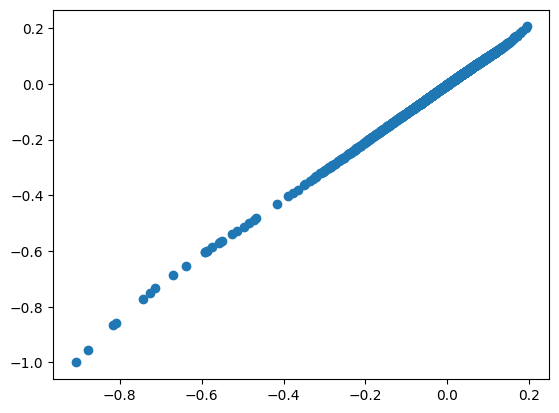

In [137]:
%%time
%run TimeNetworksV2
            
self=GAMI(meta_data=meta_data,meta_target=meta_target,  meta_data_pair=meta_data_pair, epochs=[25,5,5], 
          batch_size = 250,  task_type="Regression",learning_rate=[0.005,0.005,0.001])

self.Train(data_dict,0)  
# self.Train(df_dict,1)  

self.call(data_dict)  

plt.scatter(self.call(data_dict).numpy(),data_dict["target"])

In [132]:
self.MB.get_weights()

{'Coefficients': {'X1': -0.008801493,
  'X2': -0.041670047,
  'X3': 0.038311772,
  'X4': -0.04003293},
 'Bias': 0.00317195}

In [79]:
self.call(data_dict).numpy()

array([0.85199314, 0.85199314, 0.85199314, ..., 0.85199314, 0.85199314,
       0.85199314], dtype=float32)

(<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
 array([[0.0003187],
        [0.0003187],
        [0.0003187],
        [0.0003187],
        [0.0003187]], dtype=float32)>,
 array([-0.13953962, -0.15388299, -0.20907761, -0.15046834, -0.20017114]))

In [201]:
# develop meta_data

meta_data = {}; i=-1

# i = i + 1; var = f"X{i}"
# category_num = 1
# Time_Series = False
# Categorical=True
# input_dim = (1,)
# meta_data[var] = {"input_dim": input_dim, "arch_layers": arch_layers_categ, "name": var, "Time_Series": Time_Series,"Categorical":Categorical}

# i = i + 1; var = f"X{i}"
# category_num = 1
# Time_Series = False
# Categorical=True
# input_dim = (1,)
# meta_data[var] = {"input_dim": input_dim, "arch_layers": arch_layers_categ, "name": var, "Time_Series": Time_Series,"Categorical":Categorical}

i = i + 1; var = f"X{i}"
category_num = 1
Time_Series = False
Categorical=False
input_dim = (category_num,)
meta_data[var] = {"input_dim": input_dim, "arch_layers": arch_layers_number, "name": var, "Time_Series": Time_Series,"Categorical":Categorical}

i = i + 1; var = f"X{i}"
Time_Series = False
Categorical=False
input_dim = (category_num,)
meta_data[var] = {"input_dim": input_dim, "arch_layers": arch_layers_number, "name": var, "Time_Series": Time_Series,"Categorical":Categorical}


i = i + 1; var = f"X{i}"
Time_Series = False
Categorical=False
input_dim = (category_num,)
meta_data[var] = {"input_dim": input_dim, "arch_layers": arch_layers_number, "name": var, "Time_Series": Time_Series,"Categorical":Categorical}

# i = i + 1; var = f"X{i}"
# category_num = 8
# Time_Series = True
# Categorical=False
# input_dim = (category_num,1)
# meta_data[var] = {"input_dim": input_dim, "arch_layers": arch_layers_time, "name": var, "Time_Series": Time_Series,"Categorical":Categorical}

# i = i + 1; var = f"X{i}"
# category_num = 8
# Time_Series = True
# Categorical=True
# input_dim = (category_num,1)
# meta_data[var] = {"input_dim": input_dim, "arch_layers": arch_layers_time, "name": var, "Time_Series": Time_Series,"Categorical":Categorical}

list(meta_data)

['X0', 'X1', 'X2']

In [ ]:
tfk.initializers.RandomUniform

In [4]:
# develop meta_data

meta_data = {}; i=-1

# i = i + 1; var = f"X{i}"
# category_num = 1
# Time_Series = False
# Categorical=True
# input_dim = (1,)
# meta_data[var] = {"input_dim": input_dim, "arch_layers": arch_layers_categ, "name": var, "Time_Series": Time_Series,"Categorical":Categorical}

# i = i + 1; var = f"X{i}"
# category_num = 1
# Time_Series = False
# Categorical=True
# input_dim = (1,)
# meta_data[var] = {"input_dim": input_dim, "arch_layers": arch_layers_categ, "name": var, "Time_Series": Time_Series,"Categorical":Categorical}

i = i + 1; var = f"X{i}"
category_num = 1
Time_Series = False
Categorical=False
input_dim = (category_num,)
meta_data[var] = {"input_dim": input_dim, "arch_layers": arch_layers_number, "name": var, "Time_Series": Time_Series,"Categorical":Categorical}

i = i + 1; var = f"X{i}"
category_num = 3
Time_Series = False
Categorical=False
input_dim = (category_num,)
meta_data[var] = {"input_dim": input_dim, "arch_layers": arch_layers_number, "name": var, "Time_Series": Time_Series,"Categorical":Categorical}


i = i + 1; var = f"X{i}"
category_num = 6
Time_Series = False
Categorical=False
input_dim = (category_num,)
meta_data[var] = {"input_dim": input_dim, "arch_layers": arch_layers_number, "name": var, "Time_Series": Time_Series,"Categorical":Categorical}

# i = i + 1; var = f"X{i}"
# category_num = 8
# Time_Series = True
# Categorical=False
# input_dim = (category_num,1)
# meta_data[var] = {"input_dim": input_dim, "arch_layers": arch_layers_time, "name": var, "Time_Series": Time_Series,"Categorical":Categorical}

# i = i + 1; var = f"X{i}"
# category_num = 8
# Time_Series = True
# Categorical=True
# input_dim = (category_num,1)
# meta_data[var] = {"input_dim": input_dim, "arch_layers": arch_layers_time, "name": var, "Time_Series": Time_Series,"Categorical":Categorical}

list(meta_data)



interactions=[["X0","X1"],["X2","X0"],["X1","X2"]]


meta_data_pair = {}

var0, var1 = interactions[0]
arch_layers2 = [{"Net": "Dense", "Val": 256,  "Norm": [-1,1]}]

meta_data_pair[f"{var0} x {var1}"] = {
    "input_dim": [meta_data[var]["input_dim"] for var in [var0, var1]],
    "name": [meta_data[var]["name"] for var in [var0, var1]],
    "arch_layers": [meta_data[var]["arch_layers"][:-1] for var in [var0, var1]] + [arch_layers2],
    "Time_Series": [meta_data[var]["Time_Series"] for var in [var0, var1]],
}

var0, var1 = interactions[1]
arch_layers2 = [{"Net": "Dense", "Val": 256, "Norm": [-1,1]}]

meta_data_pair[f"{var0} x {var1}"]  = {
    "input_dim": [meta_data[var]["input_dim"] for var in [var0, var1]],
    "name": [meta_data[var]["name"] for var in [var0, var1]],
    "arch_layers": [meta_data[var]["arch_layers"][:-1] for var in [var0, var1]] + [arch_layers2],
    "Time_Series": [meta_data[var]["Time_Series"] for var in [var0, var1]],
}

var0, var1 = interactions[2]
arch_layers2 = [{"Net": "Dense", "Val": 256, "Norm": [-1,1]}]
meta_data_pair[f"{var0} x {var1}"]  = {
    "input_dim": [meta_data[var]["input_dim"] for var in [var0, var1]],
    "name": [meta_data[var]["name"] for var in [var0, var1]],
    "arch_layers": [meta_data[var]["arch_layers"][:-1] for var in [var0, var1]] + [arch_layers2],
    "Time_Series": [meta_data[var]["Time_Series"] for var in [var0, var1]],
}

def generate_data_from_meta_data(meta_data):
    data = {};
    for var in meta_data:
        input_dim=meta_data[var]["input_dim"][0]
            
        if meta_data[var]["Time_Series"]:
            d = np.random.uniform(0, 1, [num_samples, input_dim,1]);
        elif meta_data[var]["Categorical"]:
            d = np.random.uniform(0, 1, [num_samples, 1]);
            d = (d * input_dim).astype(int)    +1
        else:
            d = np.random.uniform(0, 1, [num_samples, input_dim]);
        data[var] = d
        # print(var,category_num)
    return data
def F1(x,m,c,n):
    if n==0:
        u= x    
    if n==1:
        u= x+x**2/2
    if n==1:
        u= np.exp(-np.abs(x))*x
    if n==1:
        u= x
    if n==1:
        u= x*np.log(np.abs(x)+0.001)
    if n==1:
        u= x/(np.abs(x)+0.001)
    if n==1:
        u= x+0.5*x*np.sin(x*np.pi/16)+x
    y=np.ravel(np.dot(m.T,x.T).T);
    y=y/np.nanmax(np.abs(y))+c
    return y

def F2(X,M,c,n=0):
    [x0,x1]=X
    [m0,m1]=M        
    y0=np.ravel(np.dot(m0.T,x0.T).T);
    y1=np.ravel(np.dot(m1.T,x1.T).T);        
    if n==0:            
        y=(y0+y1)+c
        y=y/np.max(np.abs(y))+c
    if n==1:
        y=(y0+y1)**2+c
        y=y/np.max(np.abs(y))+c
    if n==2:
        y=np.abs(y0+y1)+c
        y=y/np.max(np.abs(y))+c
    return y

In [53]:
# Generate Data

data=generate_data_from_meta_data(meta_data)

Y=0
coeff1={}
W=np.random.uniform(0,1,num_samples)
C=np.random.uniform(-1,1)
for n,var in enumerate(list(meta_data)):   
    c = np.random.uniform(-1, 1, )
    m=np.random.uniform(0,1,data[var].shape[1:]).reshape(-1,1); 
    x=data[var];
    Y=Y+F1(x,m,c,n)    
    coeff1[var]={"m":m,"c":c}

n=-1
coeff2={}
for V0,V1 in interactions :
    n = n+1
    c = np.random.uniform(-1, 1, )
    M=[np.random.uniform(0,1,data[V0].shape[1:]).reshape(-1,1), np.random.uniform(0,1,data[V1].shape[1:]).reshape(-1,1)]
    X=[data[V0],data[V1]]
    Y=Y+F2(X,M,c,n)
    coeff2[f"{V0} x {V1}"]={"m":M,"c":c}
    
u=np.mean(Y)
Y=Y-u


W=np.random.uniform(0,1,num_samples)

i_list=[i for i in range(num_samples)]
np.random.shuffle(i_list)
i_list=i_list

data["target"]=Y.reshape(1,-1)[0]
data["weight"]=W.reshape(1,-1)[0]

In [54]:
# data engineering
df_dict={}

df_dict["target"]=data["target"]
df_dict["weight"]=data["weight"]
for var in meta_data:
    
    if meta_data[var]['Time_Series']:
        e=(data[var][:,:,0])
        enc=MinMaxScaler()        
        df_dict[var]=enc.fit_transform(e).reshape((e.shape[0],e.shape[1],-1))
    
    elif meta_data[var]['Categorical']:
        enc=IdentityEncoder()
        df_dict[var]=enc.fit_transform(data[var])
        meta_data[var]['Encoder']=enc
    else :
        enc=MinMaxScaler()
        df_dict[var]=enc.fit_transform(data[var])
        meta_data[var]['Encoder']=enc

meta_target={"target":"target","weight":"weight", "train":i_list[:int(num_samples*.7)],
             "valid":[ i_list[int(num_samples*.7):],i_list[int(num_samples*.4):int(num_samples*.8)], ]}
meta_target={"target":"target","weight":"weight", "train":i_list[:int(num_samples*.7)],
             "valid":[  ]}

# Test Networks

In [25]:
%run NetworksV5
            
self=GAMI(meta_data=meta_data,meta_target=meta_target, meta_data_pair=meta_data_pair, epochs=3, batch_size = 256, task_type="Regression")
self.call(df_dict)
self.MB.get_weights(),self.PB.get_weights();

<tf.Tensor: shape=(10000,), dtype=float32, numpy=
array([0.01420535, 0.01420535, 0.01420535, ..., 0.01420535, 0.01420535,
       0.01420535], dtype=float32)>

In [35]:
df_dict['target']

array([-0.18561227, -0.44247532, -0.10503811, ...,  0.55801017,
       -0.9498207 ,  0.00575359])

MB: 40 PB: 19 All: 59   
Epoch 1/[5, 5, 5]: 40: [[105242350.0], []]
Epoch 2/[5, 5, 5]: 40: [[98962540.0], []]
Epoch 3/[5, 5, 5]: 40: [[96058040.0], []]
Epoch 4/[5, 5, 5]: 40: [[94422200.0], []]
Epoch 5/[5, 5, 5]: 40: [[93372460.0], []]
MB: 40 PB: 0 All: 40   
Epoch 1/[5, 5, 5]: 19: [[93221064.0], []]
Epoch 2/[5, 5, 5]: 19: [[92639820.0], []]
Epoch 3/[5, 5, 5]: 19: [[91368430.0], []]
Epoch 4/[5, 5, 5]: 19: [[89175544.0], []]
Epoch 5/[5, 5, 5]: 19: [[85848420.0], []]
MB: 0 PB: 19 All: 19   
Epoch 1/[5, 5, 5]: 59: [[79683920.0], []]
Epoch 2/[5, 5, 5]: 59: [[73301740.0], []]
Epoch 3/[5, 5, 5]: 59: [[67933800.0], []]
Epoch 4/[5, 5, 5]: 59: [[63253730.0], []]
Epoch 5/[5, 5, 5]: 59: [[58787320.0], []]


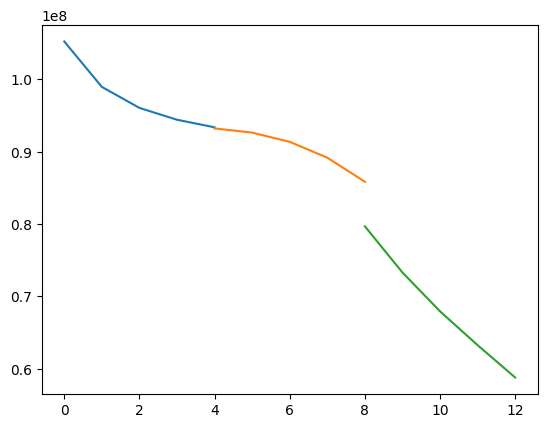

CPU times: total: 44.5 s
Wall time: 1min 14s


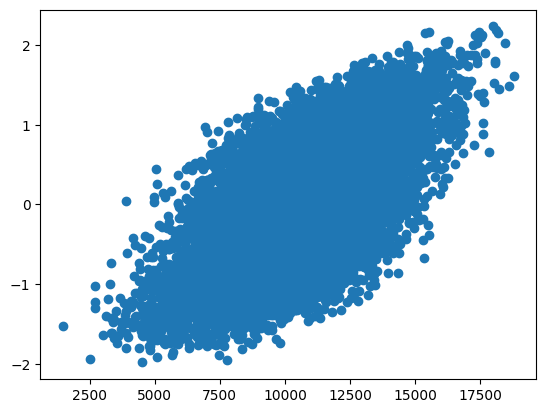

In [336]:
%%time
%run NetworksV5
            
self=GAMI(meta_data=meta_data,meta_target=meta_target, 
          meta_data_pair=meta_data_pair, epochs=[5,5,5], batch_size = 1000,
                 task_type="Regression",learning_rate=[0.005,0.005,0.001])

self.Train(df_dict,0)  
self.Train(df_dict,1)  
self.Train(df_dict,2)  
# self.Train(df_dict,2)  
# self.Train_PairEffect(data)     
# self.Train(df_dict,2)  
# self.Train_PairEffect(data)     
for k in [0,]:
       j=0;c=0
       plt.plot([i+c for i in self.Record_Losses[0]], [self.Record_Losses[0][i][k][0]  for i in self.Record_Losses[0]])
       j=1; c=c+len(self.Record_Losses[j-1])
       plt.plot([i+c-1 for i in self.Record_Losses[j]], [self.Record_Losses[j][i][k][0]  for i in self.Record_Losses[j]])
       j=2; c=c+len(self.Record_Losses[j-1])
       plt.plot([i+c-2 for i in self.Record_Losses[j]], [self.Record_Losses[j][i][k][0]  for i in self.Record_Losses[j]])
       # j=2; c=c+len(self.Record_Losses[j])
       # plt.plot([i+c-1 for i in self.Record_Losses[j]], [self.Record_Losses[j][i][0][0]  for i in self.Record_Losses[j]])
plt.show()
plt.scatter(self.predict(df_dict).numpy(),df_dict['target'])

In [301]:

compute_feature_importance(self, df_dict),compute_pair_importance(self, df_dict)

(({'X0': 0.031215204,
   'X1': 0.031215204,
   'X2': 0.7609417,
   'X3': 0.24477129,
   'X4': 0.21568896,
   'X5': 0.21932459},
  {'X0': 8.881784e-16,
   'X1': 8.881784e-16,
   'X2': 0.5029504,
   'X3': 0.072010905,
   'X4': 0.011573848,
   'X5': 0.0112948185}),
 ({('X0', 'X1'): 0.0, ('X2', 'X3'): 0.025040006, ('X1', 'X2'): 0.013158798},
  {('X0', 'X1'): 0.0,
   ('X2', 'X3'): 0.00018369817,
   ('X1', 'X2'): 2.3831028e-05}))

In [303]:
wgts=[np.ravel(c.numpy()) for c in self.MB.Output_Layer.variables][0]
MB
for var in 

array([1.0209904 , 1.0209904 , 1.0317458 , 1.006962  , 0.96827227,
       0.967854  ], dtype=float32)

In [270]:
[np.ravel(c.numpy()) for c in self.PB.Output_Layer.variables]

[array([ 0.        ,  0.19069625, -0.01428955], dtype=float32)]

In [278]:
[c.numpy() for c in self.PB.Output_Layer.variables]

[array([[-0.04575037],
        [ 0.05358365],
        [ 0.00536062]], dtype=float32)]

In [267]:
e=[c.numpy() for c in self.MB.MainEffect_Block_Networks["X1"].Hidden_Layers[-1].variables]

np.linalg.norm(np.ravel(e[0]))

0.9999998

In [266]:
e[0]

array([[ 2.85518151e-02],
       [-2.97469255e-02],
       [-1.91732589e-02],
       [-3.70719917e-02],
       [-1.62920460e-01],
       [-5.96251413e-02],
       [ 8.83081704e-02],
       [ 3.13103534e-02],
       [-2.52663903e-02],
       [ 1.98047087e-02],
       [-1.69707034e-02],
       [-1.90135650e-02],
       [ 2.78808158e-02],
       [ 5.87043688e-02],
       [ 5.87469302e-02],
       [ 3.93510908e-02],
       [-3.73445153e-02],
       [-2.26959437e-02],
       [ 3.61075699e-02],
       [-5.46765067e-02],
       [-8.42039939e-03],
       [-1.24582034e-02],
       [-2.40156539e-02],
       [-2.77893525e-02],
       [ 2.71604955e-02],
       [-1.59778092e-02],
       [ 2.49703210e-02],
       [-7.45558739e-02],
       [-9.09108743e-02],
       [-1.00554386e-02],
       [-1.13983722e-02],
       [ 4.82052267e-02],
       [ 6.41609952e-02],
       [-1.31681757e-02],
       [-2.08613393e-03],
       [-3.48127075e-02],
       [-6.69435859e-02],
       [ 7.85099342e-02],
       [ 5.6

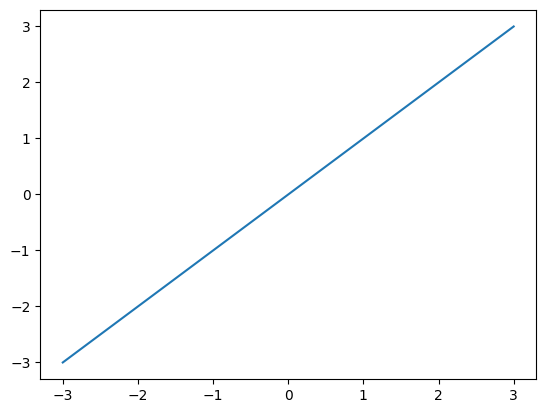

In [189]:

plt.plot([-3,3],[-3,3])

In [26]:
# Example Code to Train MainEffectBlock with Validation

# Required Imports
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np

# Define the meta_data for MainEffectBlock (example)
num_samples = 1000
num_features = 5

# Generate example data
data = {
    f"X{i}": np.random.rand(num_samples, 1) for i in range(num_features)
}
meta_data = {
    f"X{i}": {
        "input_dim": (1,),
        "arch_layers": [{"Net": "Dense", "Val": 128}, {"Net": "Drop", "Val": 0.3}],
        "name": f"X{i}",
        "Time_Series": False,
    }
    for i in range(num_features)
}

# Generate target variable
y = np.random.rand(num_samples, 1)

# Train-test split
train_data, val_data, train_y, val_y = train_test_split(data, y, test_size=0.2, random_state=42)

# Prepare data for MainEffectBlock
def prepare_data(data_dict):
    return {key: tf.convert_to_tensor(data_dict[key], dtype=tf.float32) for key in data_dict}

train_data = prepare_data(train_data)
val_data = prepare_data(val_data)

# Initialize MainEffectBlock
main_effect_block = MainEffectBlock(meta_data)

# Define optimizer and loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_fn = tf.keras.losses.MeanSquaredError()

# Training loop
epochs = 50
batch_size = 32
for epoch in range(epochs):
    # Shuffle the training data
    indices = np.random.permutation(len(train_y))
    train_data_shuffled = {key: value[indices] for key, value in train_data.items()}
    train_y_shuffled = train_y[indices]

    # Train in batches
    for start in range(0, len(train_y), batch_size):
        end = start + batch_size
        batch_data = {key: value[start:end] for key, value in train_data_shuffled.items()}
        batch_y = train_y_shuffled[start:end]

        with tf.GradientTape() as tape:
            predictions = main_effect_block(batch_data)
            loss = loss_fn(batch_y, predictions)

        gradients = tape.gradient(loss, main_effect_block.trainable_variables)
        optimizer.apply_gradients(zip(gradients, main_effect_block.trainable_variables))

    # Validation
    val_predictions = main_effect_block(val_data)
    val_loss = loss_fn(val_y, val_predictions)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.numpy():.4f}, Val Loss: {val_loss.numpy():.4f}")

# Example usage: Training ends here


ValueError: Found input variables with inconsistent numbers of samples: [5, 1000]